# Introduction 

Divvy is Chicagoland’s bike share system across Chicago and Evanston and it provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago. 

Until now, Divvy offers a flexible pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are members. It has been concluded from revenue analysis that annual members are much more profitable than casual riders. 

Although the flexible pricing plans helps attract more customers, the executive team believes that the keys to future grow rely on maximizing the number of annual membership. Instead of creating a marketing campaign targeting all-new customers, it is cost effective to convert casual riders into members because they are already aware of the Divvy program and have chosen share-bike for their mobility needs.

Therefore, the objective of this project is to identify those potential customers behavior patterns and design a marketing campaign to attract them to become members. The analysis will be performed based on data of the previous 24 months to explore how different types of users are using Divvy bikes and thus try to gain insights for marketing strategies that aim at converting casual riders to annual members.

In this project, the major task is data collection from a reliable source, data cleaning, data analysis to examine the patterns between users and present the analysis with data visualization. Last, this project will conclude with some recommendations. 

# Data
	
It is an open-sourced data provided by Lyft Bikes and Scooters, LLC (“Bikeshare”) who operates the City of Chicago’s (“City”) Divvy bicycle sharing service, and is available in their website (https://www.divvybikes.com/system-data) for anyone to use. After downloading the original dataset, it is advisable to keep a copy before any manipulation. 

## - Data overview

Quarterly data is available in csv format dating back to 2013. From the metadata file, every trip taken with a Divvy bike has been recorded with the following information:
Day and time trip started and ended 
Time of trip in seconds 
Trip starting and ending stations (id and name)
User type (“Casual Rider”, “Member”) and 
If a Member trip, it will also include Member’s gender and year of birth

Stations information is also found in the file, including:
Station name
Location (latitude and longitude)
Capacity and 
Age of the station 

## - Data integrity

The data has a problem with the consistency.  For trip id information, there are “trip_id”, “ride_id”, and “Rental ID’ . As for start time, various column headers are seen such as “start_time”, “starttime”, “started_at”, and “Local Start Time”. Similar situation also finds in column headers like end time, station id/name, birth year, and trip duration. This was an easy column rename fix. 

Another problem is trickier that the date format for the years varied. Some tables use '%Y-%m-%d and others use ‘%m/%d/%Y'. But fortunately, panda provides a powerful to_datetime() function able to read multiple formats and convert them all to the same.

One more little problem exists in recording user type. In one column, ‘member/casual' was seen while ‘subscriber/customer’ in another. Also, panda has its mapping function to easily fix this problem, and we will use “Member/Casual Rider” across the dataset.

## - Data cleaning 

Basically,  the data is complete that in the key columns suck as start time, end time, there are no missing values and user type has a few. Therefore,  the major part of data cleaning involves renaming the columns, converting the date time in the same format, and agreeing upon one description of objects. 

Even though the trip duration column in the original dataset has a large proportion of missing data, it is easy to fill the null by computing the difference between ending time and starting time and then converting into minute. 

## - Data transforming 

Two kinds of data need transformation in the dataset; one is the trip duration, and another is the date time data, which need to be extracted the components such as months, weekdays, days, and hours. Moreover, a season column will be generated based on month columns. 

## - Data validation

This process is to filter out invalid data point. In this case, image one record has the same start and end station name and a ride length less than one minute. The customer might have changed of mind and checked the bike back to the station. Therefore, we will consider such data point as invalid. Other invalid data include trips whose station name is NaN. 

## - Data merging 

After renaming the columns on each table, now it is time to merge all tables into one.  More than 30 millions records exists in 52 tables. The first step is to read those tables into pandas Dataframes. Next, since we have renamed the columns name uniformly, we can either use pandas merge( ) and concat( ) functions. Last,  for further convenience, it is good to save the dataset in .pkl format, which serialize object to file, and it processes more efficiently to read a pickled file than csv file in pandas when it comes to large dataset. 

# Exploratory Data Analysis

Always keep the objective of the project in mind that figure out the difference in pattern between Members and Casual riders. Also, it is less significant to analyze all data back to 2013, so the following analysis will be completed on the latest two-year observations, from January 2020 to January 2022. Next, the data will be split into Member and Casual riders parts. 

Throughout the years from 2020 to 2022,  9,155,740 trips were completed. After deleting those trips less than one minute and missing station names,  the amount of valid trips is 7,870,571, and Casual riders took up 41.94% while Members constituted 58.0.6%. 

From there, the analysis will focus on number of trips broken down by stations, by days, and by hour of the day. Furthermore, we will examine the seasonal change of trips.  

## 1. What are the busiest stations?

This part of analysis is to help decide the locations to run a promotion if needed. The most favorable sites are where casual riders visited the most. Figure 1 is a Sankey diagram showing the top 10 stations where casual riders visited and how the trips flowed.
 
This diagram looks symmetric and not a single station takes up the lion’s share. Visitors at Streeter Dr & Grand Ave are greater than others and most of the trips that checked in at this station came from other places. Basically, the top 10 stations on check-out side and check-in side share a similar list. One possible explanation is that those stations are close to popular tourists attraction and visitors flow between them. Next, I will create another Sankey diagram on the Member part, but this time the focus will be on the difference in where Members and Casual riders went with the help of a Venn diagram. 

Figure 1. The Flows between the Busiest Start and End Stations: Casual riders
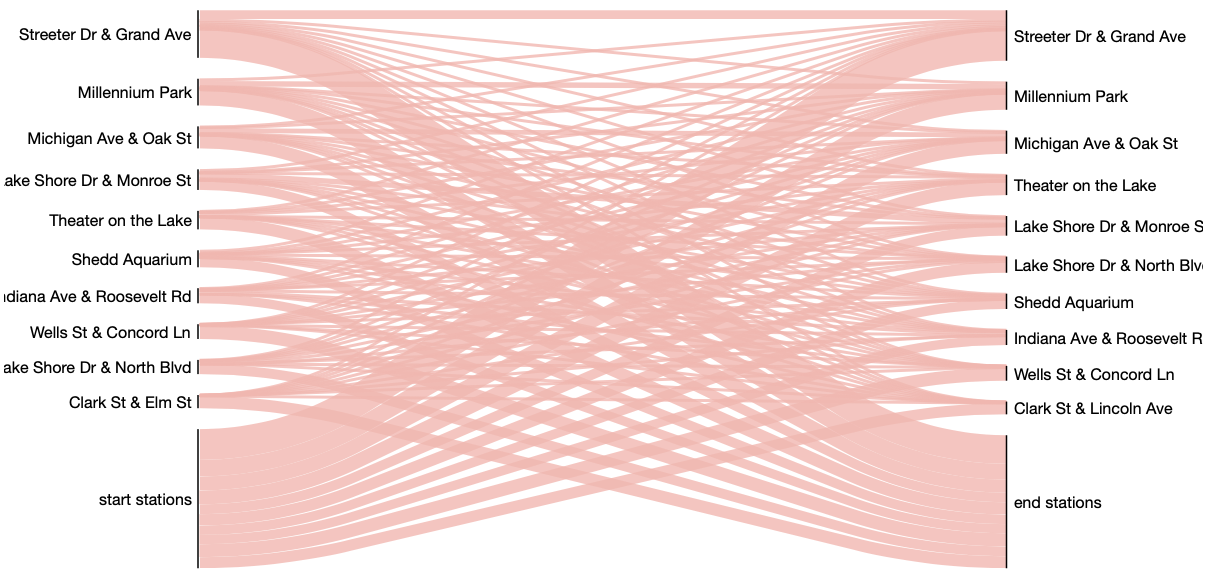

Figure 2. The Flows between the Busiest Start and End Stations: Members
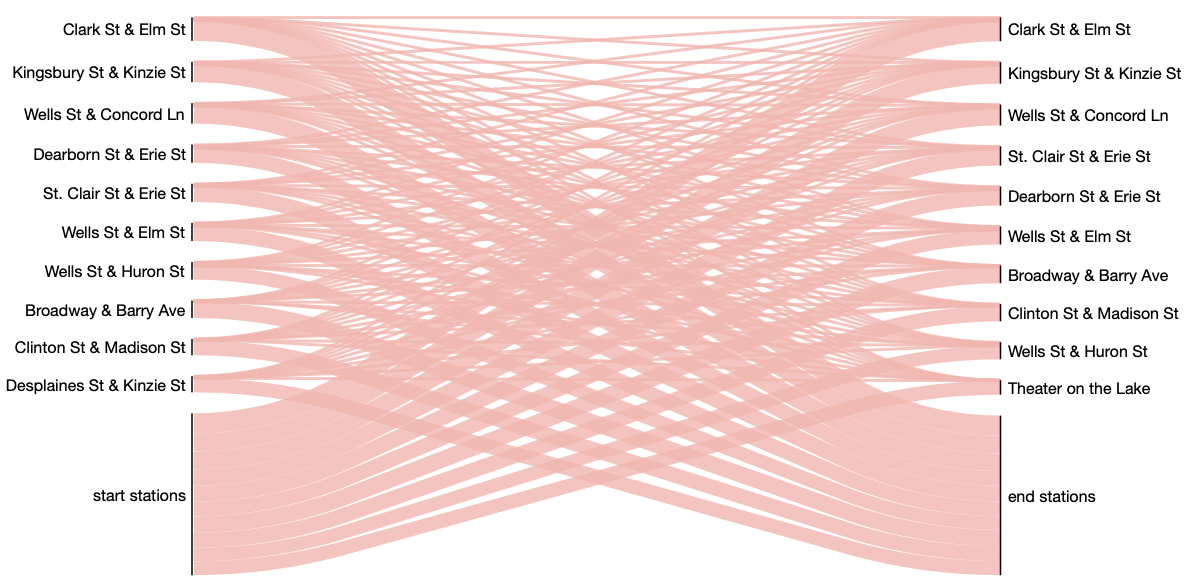

The symmetry also shows in this diagram, even more evenly distributed. So far we have not gained much insight regarding the difference between members and casual riders; for this purpose, next move is to draw a Venn diagram to display the relation between their end stations. 

Figure 3 tells us that Casual riders and Members shared a distinct list of area of activities in that out of ten stations that Casual riders frequently visited, Members  visited only two of them. Moreover, combined with Figure 2, those two stations ranked the lowest for Members. It is clear that two user types have divergent routes. 
Furthermore, considering that Casual riders can be visitors for their holidays or vacations. Shared bikes are good alternative when sightseeing, but it is pointless targeting this proportion of Casual riders; Therefore, one recommendation would be filtering out those trips flowing between recreational areas because those trip riders are possibly non-residents. Then the remaining of stations, both starting and ending, would be ideal places for running an advertisement event, with a great possibility of touching the potential Casual riders directly. 

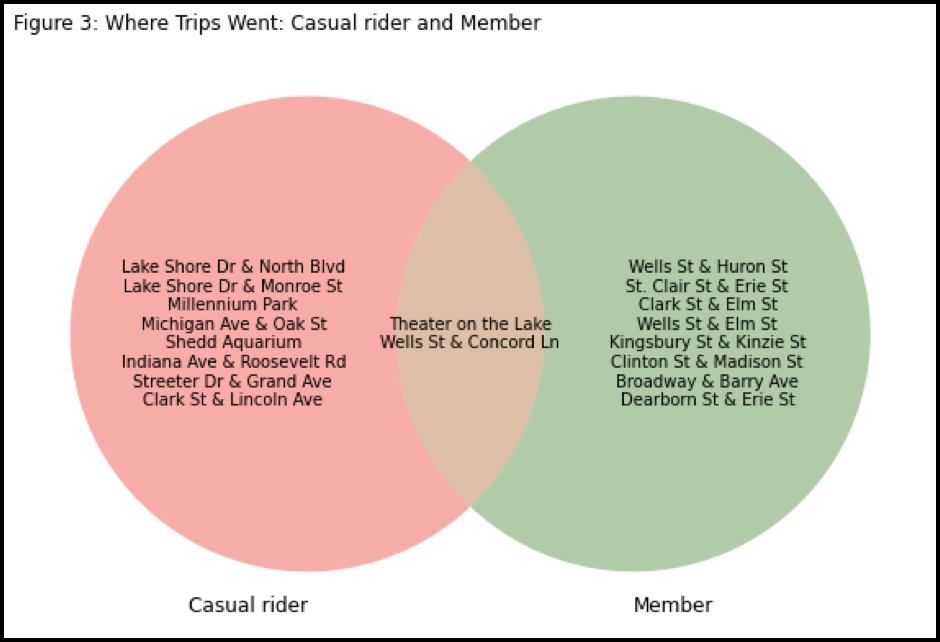

## 2. Analysis of Number of Rides, Broken Down by Days, by Hours, and by Day of Week

Across the timespan being analyzed, the average daily trips for Casual riders is 4,332 while this figure for Members is greater, reaching at 5,996. Figure 4 shows how trips are distributed daily. The number of trips is dramatically higher in the summer time than in other seasons.

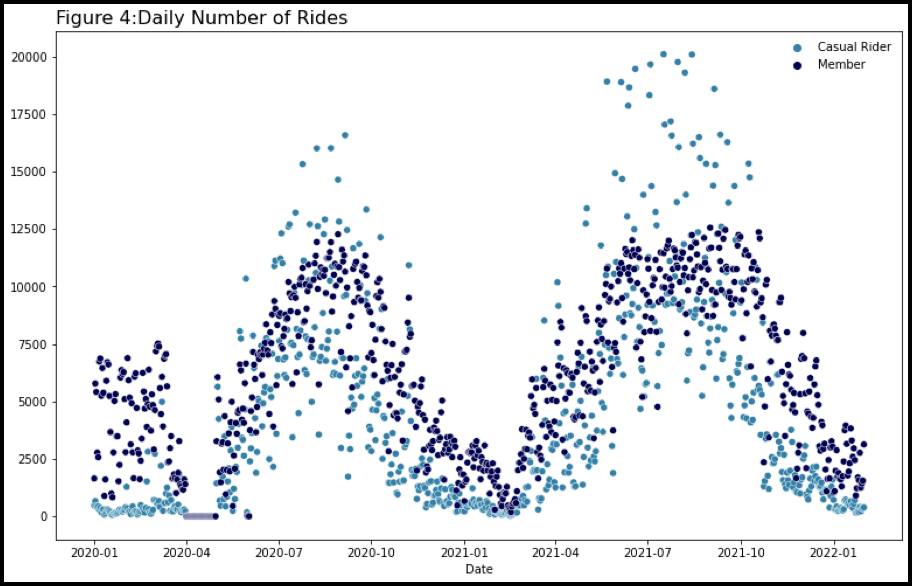

Besides, Members take more trips than Casual riders most of the time except for in August and September, probably because Chicago attracts a great number of visitors in these two months. It is preferable to analyze the trips taking place outside the recreational zones, but it needs further information regarding the distribution of Chicago’s tourist attractions.


In Figure 5, the number of trips is summed by the hour of the day. For an average  Member, he/she is likely to commute via Divvy on a morning and afternoon rush. It is interesting to see that the afternoon commute has tremendously more trips than the morning commute, possibly because after work people are going to get food or meet others for happy hour, something that is not done as much in the morning. Casual riders’ usage of sharing bikes also peaks at 5 pm after a steady increase since 4 am.

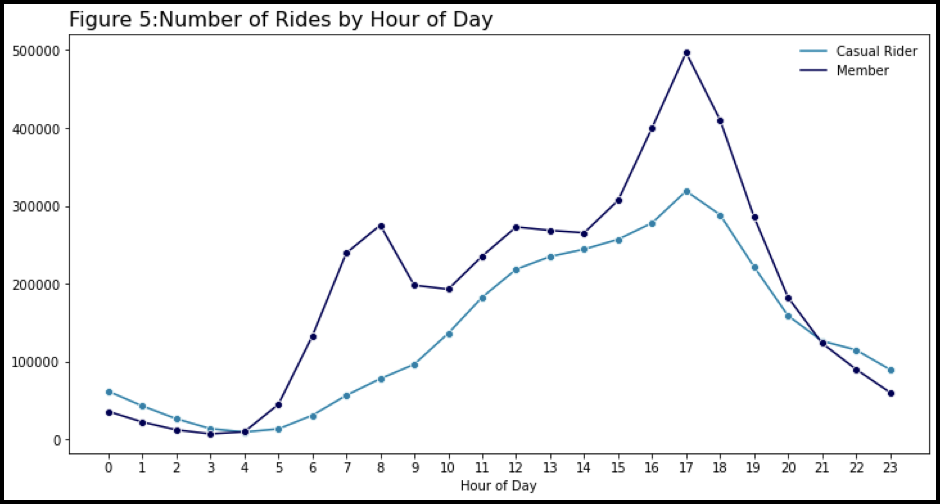

For now, we have assumed that travelers take up a great percentage of total Casual riders, and we are going to test this theory by looking at the breakdown of trips by day of week.  Figure 6 displays the distribution of total trips from the aspect of each day of the week. The usage of trips by Members and Casual riders shows a distinct pattern regarding the days of the week. Members used the bikes mostly on weekdays (Monday-Friday) while these were the low points for Casual riders. This makes sense if Members are using Divvy to commute. In addition, Casual riders most commonly rode on the weekends (Saturday and Sunday), while these were the least common for Members. This finding further confirms the previous speculation that many of the trips by Casual riders are taken by travelers coming to Chicago. If possibly, analysis of data with information about Chicago’s location of tourist attraction might give other helpful insights, and therefore is better for customer profiling and targeting. 

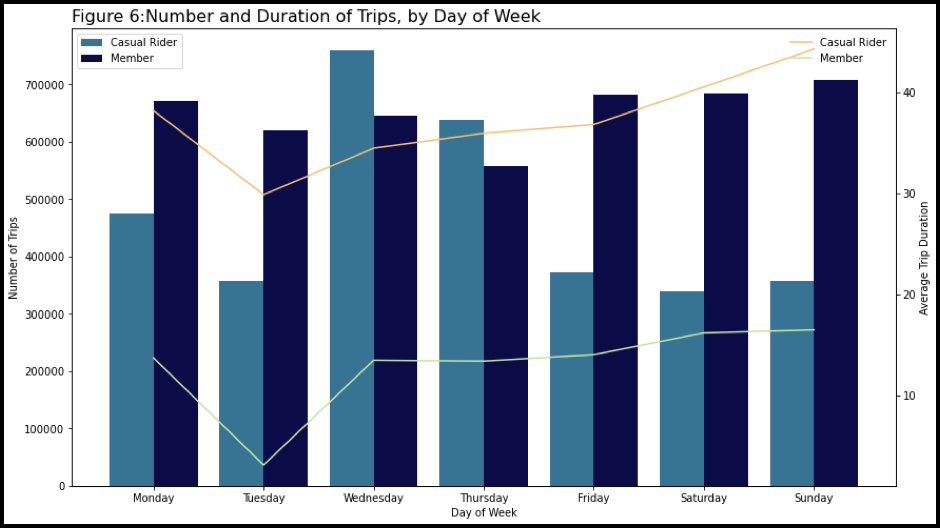

When comparing Members to Casual riders, there is an obvious gap in how long their trips lasted; the average trip for a Customer is at least 30 minutes long, seeing a significant growth on weekends, while the longest riding time for an average Member rider is 18 minutes long and it does not see an exciting variance except for a drop on Tuesday. Coincidently, the low point of average trip duration happens on Tuesdays for both user types.

Next, let’s take a step forward and break down the data by seasons. Figure 7 displays the total number of rides distributed by each day of the week during the time span being analyzed. Summer, autumn, and spring are popular seasons, especially on Saturdays where the total amount of rides reaches over 600 thousands in summer time and those figures are 400 thousands and 220 thousands in autumn and spring time, respectively.  The number of rides in winter, on the other hand, peaked at slightly over 100 thousands on Thursday.

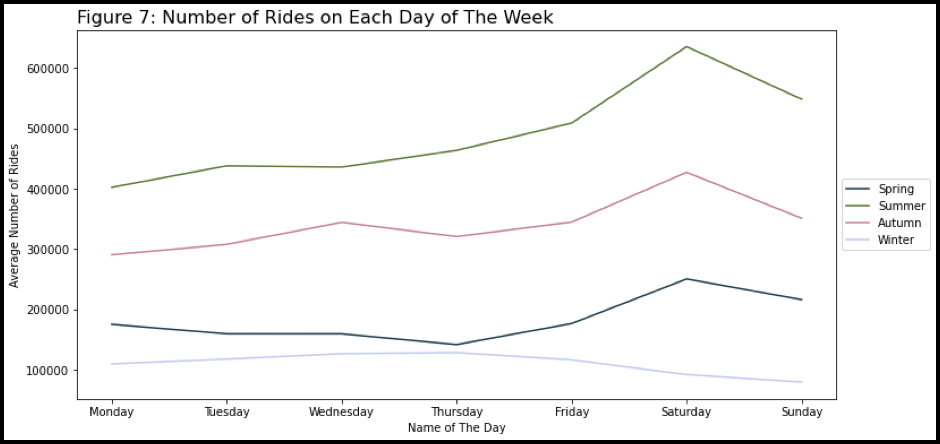

## 3. Station Operating Capability Prediction 

This part of analysis tries to solve the problem of station abundance and inadequacy. If the number of bikes checked out is known ahead of time, then Divvy can take steps to keep the station operating healthy. If not done soundly, many bikes may leave idle in an unvisited station, resulting in a waste of resource, while in other stations, Casual riders may be leaving disappointed because of scarcity of bikes. The idea is to calculate the difference between check-out and check-in of a particular station at a given hour, so that Divvy know where to reload bikes and make sure Casual riders can always access to bikes when getting to station.

The analysis is on a station basis. I will draw hour-by-hour variation of bikes check-out of a particular station and then go through the top 10 popular starting stations, since the objective is to better serve the Casual riders coming to check out bikes. First, I counted the number of checked-out trips by hour in a particular day, and then averaged those numbers by hour. I went thought this process from the checked-in aspect. 

Figure 8 is a demonstration of how the average number of trips is distributed hourly in Streeter Dr & Grand Ave station. It shows that before 3pm trips docked-in were greater than those checking out, while after 3pm the occasion showed a different pattern. That means, before 3pm, Streeter Dr & Grand Ave station had excess bikes so that company’s operation managers know where to get available bikes when needed. However, after 3pm, this station should be monitored for reloading because shortage is likely to happen if initial preparation is insufficient. 

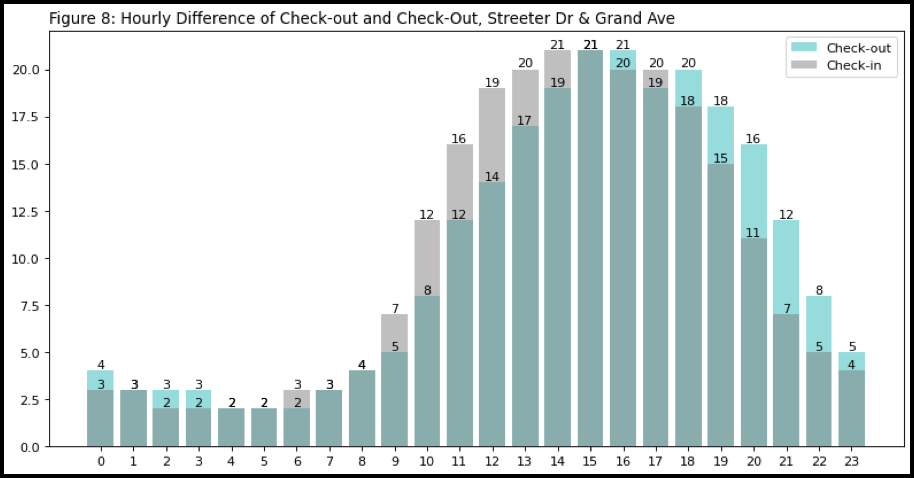

The same analysis about all other stations can be performed with their respective diagrams. With the help of Bokeh library, those diagrams can be grouped into tab panes, which allow multiple plots to be shown in selectable tabs. Also, a dropdown menu can achieve the same interactive purpose, with a neater layout.

Another part of operating capability analysis is focused on the types of bike. From Figure 9, it is no surprise to see that more trips took place in summer and autumn and docked bike was quite popular, especially among casual riders, so when reloading is needed, consider docked bike first, then classic bike. Although electric bikes were the least popular type, its demand saw a significant grow in autumn. 

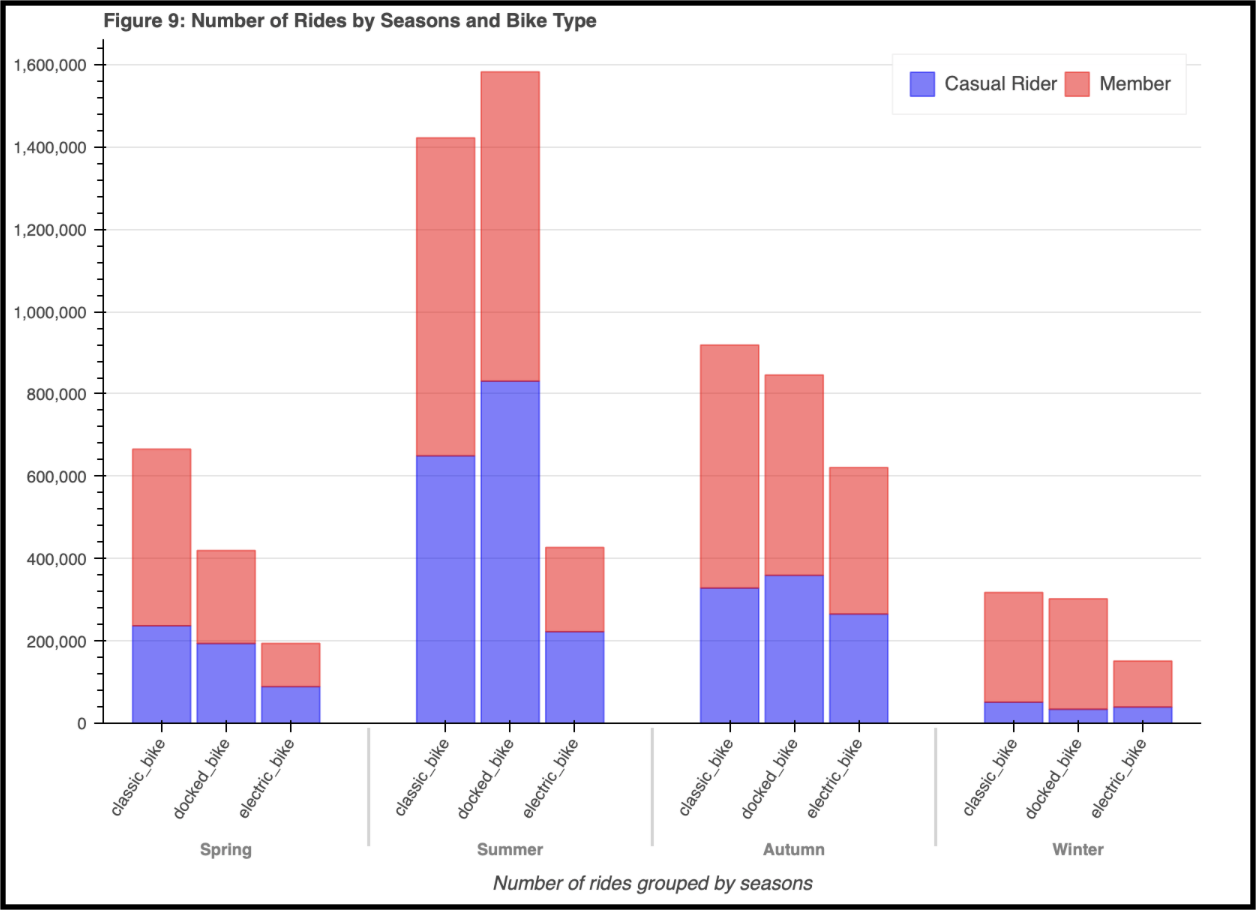

# Conclusion

The analysis focuses on finding the pattern between Casual riders and Members, aiming for targeting potential Members from the Customer group and therefore maximizing the number of annual memberships. With the analysis results at hand, a new marketing strategy will be designed to convert casual riders into annual members. 

- First, from the Sankey diagram, not a single station take a prominent position, either starting or ending stations, and also casual riders and members have distinct activities areas. Out of the top 10 popular stations for both user types, only two stations overlap. How to choose a station that target the most potential members? What we can do is filtering out those stations close to tourist attractions and then picking the most popular sites. 

- Second, we can choose favorable date and time to get as many as attention. For example, rides take place more in summer and autumn time. Besides, Casual riders use the bike more often from Fridays to Sundays. When it comes to the hour of the day, more Casual riders like to go out at 8 am and 5 pm. Therefore, it is more cost efficient to place promotional membership invitation advertisements in the afternoon of Fridays and weekends, and if conditions allow, in summer or autumn time, on most visited stations by casual riders.

- Third, possible marketing strategies might include:
    - Give special offers for new members, for example, buy 12 months membership get free 1 month membership;
    - Distribute t-shirts or helmets upon signing up for new members;
    - Initiate a green campaign that promise a donation to environmental organizations according to every mile members ride;
    - Hold a helmet design competition; winning design would be used for free bike helmets distributed to members

- Fourth, in order to promote user experience, it is strongly advised to build an in-time monitoring board to watch the capability and deploy reloading whenever needed. In addition, a detailed investigation on the demand of electric bikes is helpful when deciding purchasing the quantity of each type of bikes. 

# Limitation

The process of the data has flaws. The biggest one is that I don’t have the Chicago tourist attraction map and as a result, I am unable to filter out those trips taken by visitors. It is possible that the analysis turns out to be overwhelmingly different picture if those records are deleted. So, to be precise, perform one more analysis after obtaining new information. 

Another area for improvement is customer profiling.  The benefits of a sound customer profile system have many.  Not only will it help identify company’s best Casual riders and thus result in a more efficient marketing strategy and better marketing penetration, but also it will optimize retention and loyalty. However, the data, first, does not assign a primary key for each member, and second, only contains age and gender of members. This practice is insufficient to build a customer profile. 

Much more importantly, a customer profiling system lays the foundation of building a recommender system, which is regarded as an effective way of personalized communications with Casual riders. Casual riders expect more and more personalization nowadays, and with a well-functional personalized recommender system, they may feel more engaged with company’s business, and as a result, become the advocate of the business.